In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

In [6]:
import pandas as pd

In [43]:
data = pd.read_csv('Advertising.csv', index_col=0)

In [44]:
# data.head()
# data.tail()
# data.boxplot()
# data.shape
# data.keys()
data.describe()
# 1. Pre-processing of Data 
    # 1.1 Cleaning of Data
        # 1.2 Handling Missing Values
newData = data.dropna()
# newData = data.fillna()
# data.dropna(subset=['TV'], inplace = True)

        # 1.3 Handling Duplcates
# newData.duplicated()
# newData.drop_duplicates(inplace = True)

        # 1.4 Handling Outliers / Wrong Data
            # Remove / Replace
# for x in newData.index:
#     if newData.loc[x, "newspaper"] > 10:
#         newData.loc[x, "newspaper"] = 10
        # newData.drop(x, inplace=true) To Remove

        # 1.5 Handling Wrong Format
        
# Correlation
newData.corr()


# newData.describe()
# newData.tail()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [45]:
y=newData['sales']

In [46]:
x=newData.drop(columns=['sales'])

In [47]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [56]:
%pip install statsmodels
import statsmodels.api as sm
from statsmodels.api import OLS 

x1 = sm.add_constant(x)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
x1.describe()

,const,TV,radio,newspaper
count,200.0,200.000000,200.000000,200.000000
mean,1.0,147.042500,23.264000,30.554000
std,0.0,85.854236,14.846809,21.778621
min,1.0,0.700000,0.000000,0.300000
25%,1.0,74.375000,9.975000,12.750000
50%,1.0,149.750000,22.900000,25.750000
75%,1.0,218.825000,36.525000,45.100000
max,1.0,296.400000,49.600000,114.000000


In [58]:
model = OLS(y,x1).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.58e-96
Time:                        11:42:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
x2 = x1.drop('newspaper', axis=1)

In [64]:
model2 = OLS(y,x2).fit()

In [65]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           4.83e-98
Time:                        11:48:16   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
new_data = pd.DataFrame({
    'TV': [50, 150, 200],
    'radio': [20, 25, 30]
})

# Add constant term to the new data
new_data = sm.add_constant(new_data)

# Predict sales
predictions = model2.predict(new_data)
print(predictions)


0     8.968725
1    14.484178
2    17.711890
dtype: float64


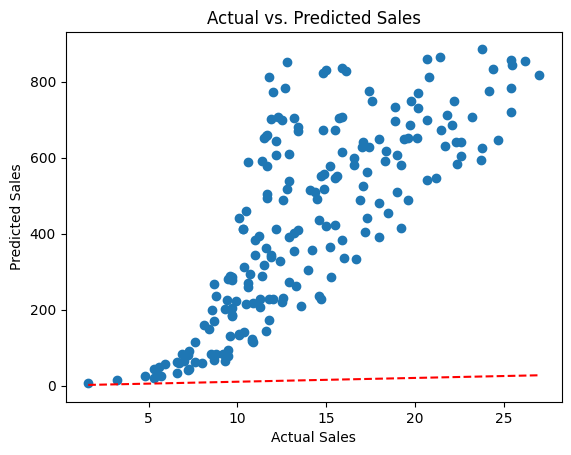

In [69]:
import matplotlib.pyplot as plt
predicted_sales = model2.predict(x)

# Scatter plot of actual vs. predicted sales
plt.scatter(y, predicted_sales)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.show()